Linear Regression Basics

What is linear regression?
    In statistics, Linear Regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) 
    and one or more explanatory variables (or independent variables)

Simple Linear Regression is of the form y = wx + b, where 
y is the dependent variable,
x is the independent variable, 
w and b are the training parameters which are to be optimized during training process to get accurate predictions.

https://towardsdatascience.com/machine-learning-basics-simple-linear-regression-bc83c01baa07

1)Get our data set
<br>
2)What is the dependent variable (y=salary) what is the independent variable (x=Years Experience)
<br>
A)Split data using scklean trains_test_split function. X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3
<br>    a.Set test size. Seting how much of the independent data will be used for test.
<br>    c.Assign a variable (r) to LinearRegression from sklearn (r = LinearRegression())
<br>    d.Fit the variable to the training set (r.fit(X_train, y_train))
<br>    e.When the model has been fitted with the training data, we see the predicted values using regress.predict(X_test)


We are first going to import the necessary packages

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Next we are going to import the data set the dataset we are getting is from a github repository

In [47]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/Salary_Data.csv')


Lets look at the data

In [61]:
dataset.head(100)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
The dataset has two colums, YearsExperience and Salary. As you can see, the more experience you have, the higery the salary.
<br>
Next, lets split the data between YearsExpericen and Salary

In [49]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X[0:5],y[0:5])
print(len(X), len(y))

[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]] [39343. 46205. 37731. 43525. 39891.]
30 30


We'll have to split the data set into two sets 
<br>
Training set - The data used in the LinearRegression model to train
<br>
Test set - The data apllied to the trained model
<br>
We also have to specify how much of the data will be set aside as the Test set and Training set
<br>
In this example, we'll use test_size=0.30, where 30% of the data will be used for the Test set, and the remaining 70% will be used for the training set

In [50]:
test_size=0.3

There are also a couple of packages from sklearn that we will need to import for the data split and Linear Regression



In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Then we split the data into their training and test set
<br>
The train_test_split function will take X and y data and split them in the to test size we specify. 
<br>
X_train will be assigned to 70% of the X values, randomly
<br>
y_test will be assigned the remaining values of X
<br>
The same will be done for y

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train)
print(len(X_train))
print(X_test)
print(len(X_test))

[[ 6.8]
 [ 8.2]
 [ 3. ]
 [ 4.9]
 [ 9. ]
 [ 4.1]
 [10.3]
 [ 9.5]
 [ 3.2]
 [ 1.1]
 [ 7.1]
 [ 5.9]
 [ 3.2]
 [ 8.7]
 [ 3.9]
 [ 2. ]
 [ 6. ]
 [ 5.1]
 [ 4. ]
 [ 3.7]
 [ 4. ]]
21
[[ 2.9]
 [ 1.5]
 [ 2.2]
 [ 5.3]
 [10.5]
 [ 9.6]
 [ 7.9]
 [ 1.3]
 [ 4.5]]
9


From sklearn we use the LinearRegression function and assign it to a variable regress
<br>
Then we call fit to fit the training data for X_train and y_train, 70% of our original data from the github repo. This the data the model will used to be trained

In [53]:
regress = LinearRegression()
regress.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now our variable regress has fitted the data from X_train and y_train, we need to see what will be predicted
We call the predict function on regress and use X_test as the test set and store the values in y_pred


In [54]:
y_pred = regress.predict(X_test)

Now we compare our test with the predicted value.
<br>
Our test set is y_test, which is 30% of the data set, and the y_pred above

In [55]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,56642.0,52688.553375
1,37731.0,39082.213778
2,39891.0,45885.383576
3,83088.0,76013.706972
4,121872.0,126551.539763
5,112635.0,117804.607165
6,101302.0,101282.623368
7,46205.0,37138.450978
8,61111.0,68238.655773


Predicted value and the real values are pretty close to each other, appears the model works well. From here if we wanted to we can do a RSME or other error testing
<br>
Then we use matplotlib to graph we us

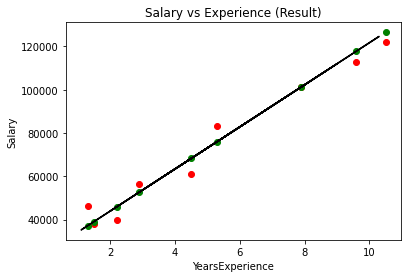

In [56]:
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.plot(X_train, regress.predict(X_train), color = 'black')
plt.title('Salary vs Experience (Result)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

Now that the regression has been solved, we can use the coefficient and intercept to replace y=mx+b (where dependent=coefficient(x)+intercept)

In [64]:
coeff = regress.coef_

In [65]:
intercept = regress.intercept_

In [74]:
x=2.9
y1 = coeff*x+intercept
print(y1)

[52688.55337538]


In [59]:
regress.predict(X_test)

array([ 52688.55337538,  39082.21377758,  45885.38357648,  76013.70697161,
       126551.53976344, 117804.60716485, 101282.62336752,  37138.45097789,
        68238.65577287])

In [70]:
y_test

array([ 56642.,  37731.,  39891.,  83088., 121872., 112635., 101302.,
        46205.,  61111.])

In [71]:
y_pred


array([ 52688.55337538,  39082.21377758,  45885.38357648,  76013.70697161,
       126551.53976344, 117804.60716485, 101282.62336752,  37138.45097789,
        68238.65577287])

In [ ]:
To get the rooot mean square error

In [93]:
np.sqrt(np.mean((y_test-y_pred)**2))

5627.934980247387

In [ ]:
To check the linear relationship

In [75]:
regress.score(X_test, y_test)

0.9657699159760414